In [1]:
import tensorflow as tf

tf.version

<module 'tensorflow_core._api.v2.version' from 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\tensorflow_core\\_api\\v2\\version\\__init__.py'>

In [2]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# * :언팩
# linspace : 랜덤으로 값을 0에서 10까지 10개 만들어줌
# randn : 난수 발생
# *X.shape : 튜플을 언팩해서 자료를 넘겨줌
X = np.linspace(0,10,10)
Y = X + np.random.randn(*X.shape)

### seed
- 무작위와 관련된 모든 알고리즘은 사실 무작위가 아니라 시자가 숫자를 정해주면 그 다음에는 정해진 알고리즘에 의해 마치 난수처럼 보이는 수열을 생성한다.
- 같은 알고리즘을 여러번 실행하더라도 다른 숫자가 나오도록 시작 숫자를 현재 시간등을 이용해서 매번 바꿔줄 수 있고, 이를 시드(seed)라고 한다.

### numpy 난수 메소드
- np.random.seed : seed를 통한 난수 생성
- np.random.rand : 0부터 1 사이의 균일 분포에서 난수 생성
- np.random.randn : 가우시안 표준 정규 분포에서 난수 생성
- np.random.randint : 균일 분포의 정수 난수 생성
- np.random.shuffle : 기존의 데이터의 순서 바꾸기
- np.random.choice : 기존의 데이터에서 sampling
- np.unique : 데이터에서 중복된 값을 제거하고 중복되지 않는 값의 리스트 출력
- np.bincount : 발생하지 않는 사건에 대해서도 카운트를 해준다

## TF 2.x 환경에서 TF 1.x 소스 실행할때 TF 임포트 방법
```python
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
```

In [4]:
# 데이터 조회
for x, y in zip(X, Y):
    print(( round(x, 1), round(y, 1) ))

(0.0, 1.2)
(1.1, 0.3)
(2.2, 3.3)
(3.3, 1.6)
(4.4, 4.1)
(5.6, 6.3)
(6.7, 7.3)
(7.8, 8.4)
(8.9, 8.8)
(10.0, 11.0)


In [5]:
# 선형 회귀모델 만들기 keras의 Sequential 을 이용
model = Sequential()
model.add( Dense(input_dim=1, units=1, activation="linear", use_bias=False) )

In [6]:
# 경사하강법으로 선형회귀함수, learning rate 0.01, 손실함수 MSE사용
sgd = optimizers.SGD( lr = 0.01 )
model.compile( optimizer = 'sgd', loss='mse' )

In [7]:
# 선형회귀모델을 학습하기전에 최초로 설정된 w를 조회
weights = model.layers[0].get_weights()
w = weights[0][0][0]
print( 'initial w is:' +str(w) )

initial w is:1.6846975


In [8]:
# 선형회귀모델 학습
model.fit( X, Y, batch_size=10, epochs=10, verbose=1 )

Epoch 1/10
10/10 [==============================] - 1s 119ms/step - loss: 15.0004
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 2.0417
Epoch 3/10
10/10 [==============================] - 0s 298us/step - loss: 0.9041
Epoch 4/10
10/10 [==============================] - 0s 299us/step - loss: 0.8042
Epoch 5/10
10/10 [==============================] - 0s 299us/step - loss: 0.7954
Epoch 6/10
10/10 [==============================] - 0s 299us/step - loss: 0.7947
Epoch 7/10
10/10 [==============================] - 0s 299us/step - loss: 0.7946
Epoch 8/10
10/10 [==============================] - 0s 299us/step - loss: 0.7946
Epoch 9/10
10/10 [==============================] - 0s 199us/step - loss: 0.7946
Epoch 10/10
10/10 [==============================] - 0s 299us/step - loss: 0.7946


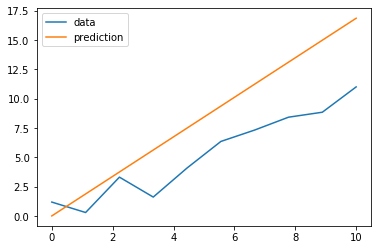

In [13]:
plt.plot(X, Y, label='data')
plt.plot(X, X*w, label = 'prediction')
plt.legend()
plt.show()